<a href="https://colab.research.google.com/github/o7s8r6/CVIVVAAN/blob/main/opencv_rotate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

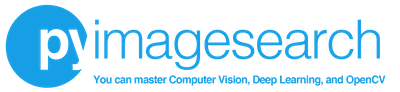

# OpenCV: Rotate images (correctly) with OpenCV and Python
### by [PyImageSearch.com](http://www.pyimagesearch.com)

## Welcome to **[PyImageSearch Plus](http://pyimg.co/plus)** Jupyter Notebooks!

This notebook is associated with the [OpenCV: Rotate images (correctly) with OpenCV and Python](https://www.pyimagesearch.com/2017/01/02/rotate-images-correctly-with-opencv-and-python/) blog post published on 2017-01-02.

Only the code for the blog post is here. Most codeblocks have a 1:1 relationship with what you find in the blog post with two exceptions: (1) Python classes are not separate files as they are typically organized with PyImageSearch projects, and (2) Command Line Argument parsing is replaced with an `args` dictionary that you can manipulate as needed.

We recommend that you execute (press ▶️) the code block-by-block, as-is, before adjusting parameters and `args` inputs. Once you've verified that the code is working, you are welcome to hack with it and learn from manipulating inputs, settings, and parameters. For more information on using Jupyter and Colab, please refer to these resources:

*   [Jupyter Notebook User Interface](https://jupyter-notebook.readthedocs.io/en/stable/notebook.html#notebook-user-interface)
*   [Overview of Google Colaboratory Features](https://colab.research.google.com/notebooks/basic_features_overview.ipynb)

As a reminder, these PyImageSearch Plus Jupyter Notebooks are not for sharing; please refer to the **Copyright** directly below and **Code License Agreement** in the last cell of this notebook. 

Happy hacking!

*Adrian*

<hr>

***Copyright:*** *The contents of this Jupyter Notebook, unless otherwise indicated, are Copyright 2020 Adrian Rosebrock, PyimageSearch.com. All rights reserved. Content like this is made possible by the time invested by the authors. If you received this Jupyter Notebook and did not purchase it, please consider making future content possible joining PyImageSearch Plus at [http://pyimg.co/plus/](http://pyimg.co/plus) today.*

### Download the code zip file

In [ ]:
!wget https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/opencv-rotate/opencv-rotate.zip
!unzip -qq opencv-rotate.zip
%cd opencv-rotate

--2021-11-10 18:06:06--  https://www.pyimagesearch.com/wp-content/uploads/2016/12/opencv-rotate.zip
Resolving www.pyimagesearch.com (www.pyimagesearch.com)... 172.104.211.12
Connecting to www.pyimagesearch.com (www.pyimagesearch.com)|172.104.211.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61723 (60K) [application/zip]
Saving to: ‘opencv-rotate.zip’

opencv-rotate.zip   100%[===================>]  60.28K  --.-KB/s    in 0.03s   

2021-11-10 18:06:06 (1.68 MB/s) - ‘opencv-rotate.zip’ saved [61723/61723]

/content/opencv-rotate


## Blog Post Code

### Import Packages

In [ ]:
# import the necessary packages
import matplotlib.pyplot as plt
import numpy as np
import argparse
import imutils
import cv2

### Function to display images in Jupyter Notebooks and Google Colab

In [ ]:
def plt_imshow(title, image):
    # convert the image frame BGR to RGB color space and display it
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(title)
    plt.grid(False)
    plt.show()

### A simple rotation problem with OpenCV

In [ ]:
# # construct the argument parse and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", required=True,
# 	help="path to the image file")
# args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
    "image": "images/saratoga.jpg",
}

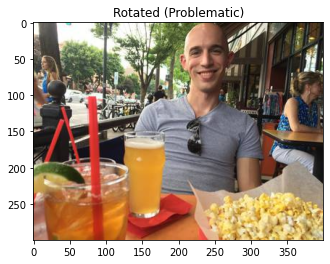

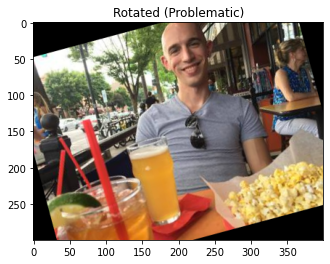

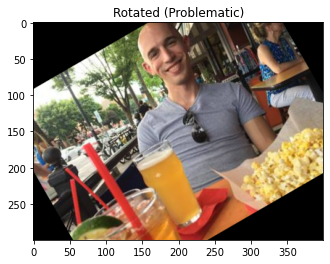

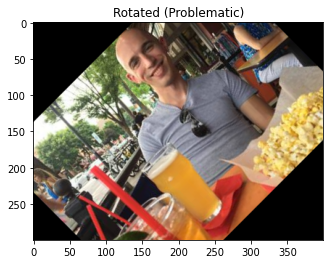

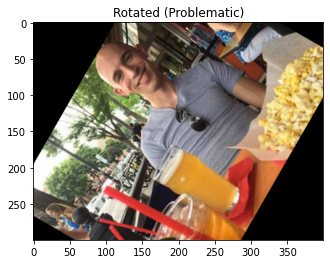

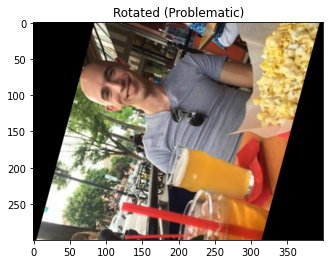

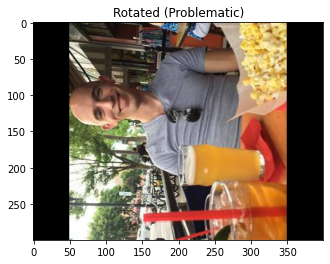

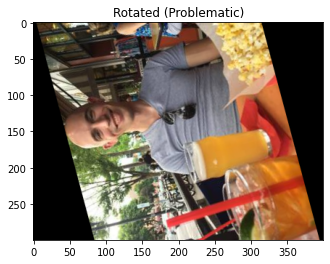

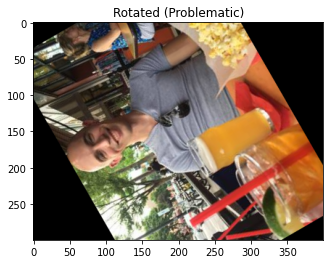

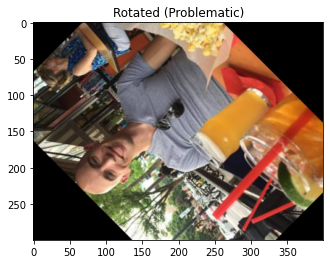

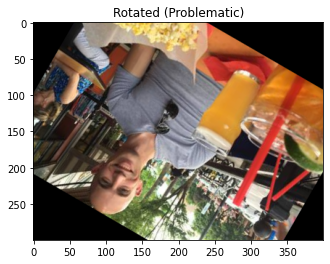

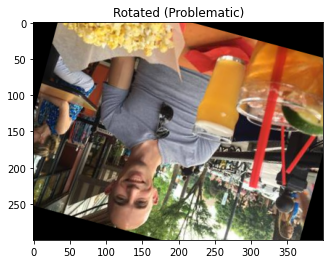

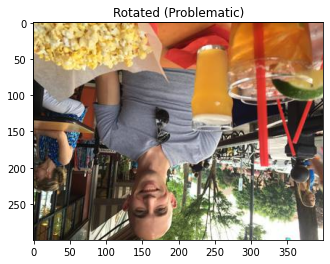

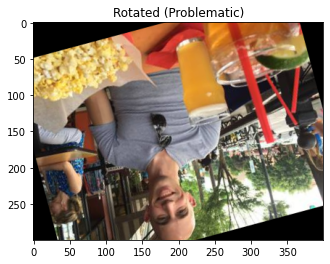

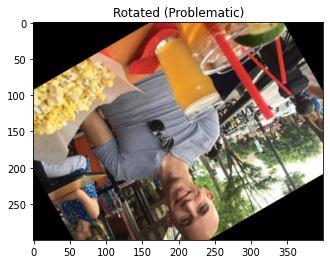

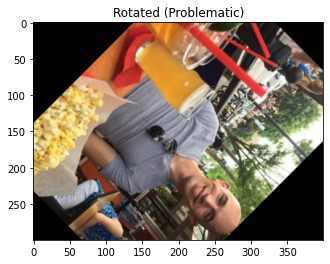

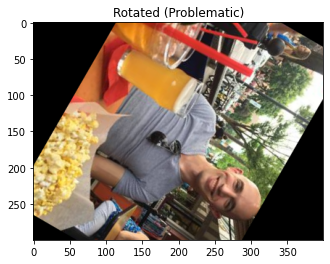

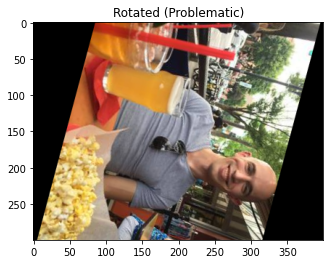

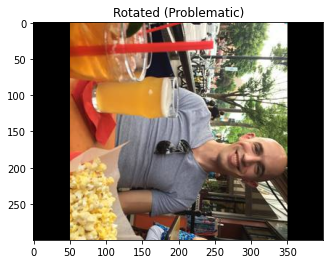

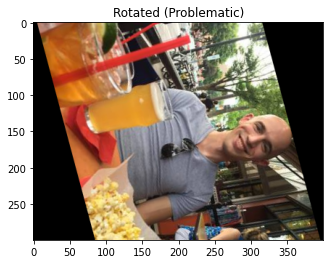

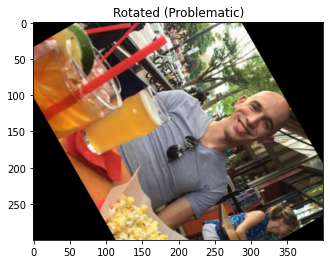

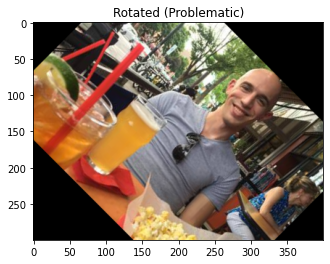

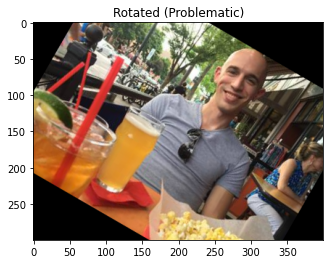

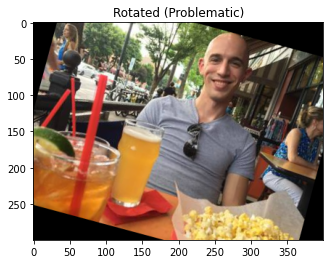

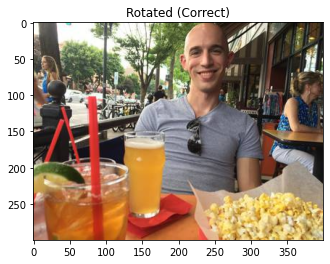

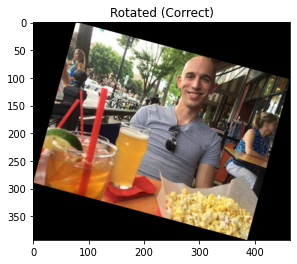

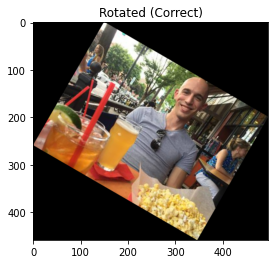

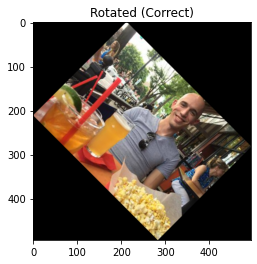

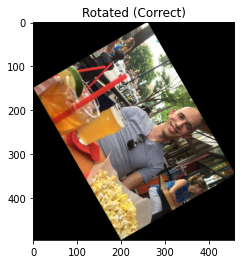

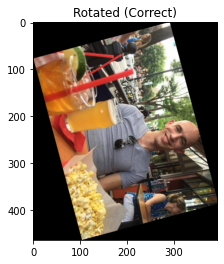

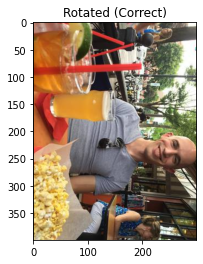

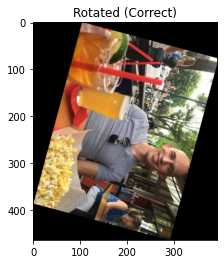

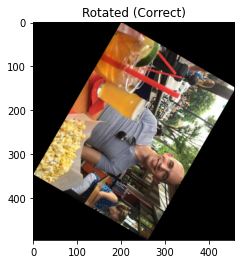

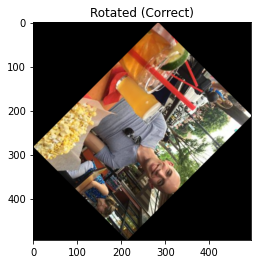

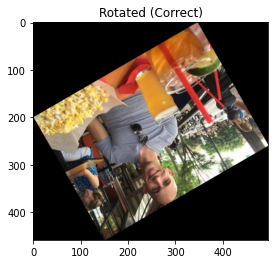

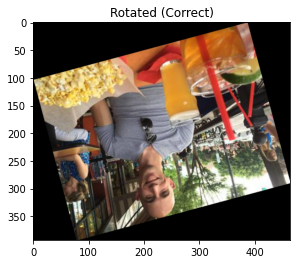

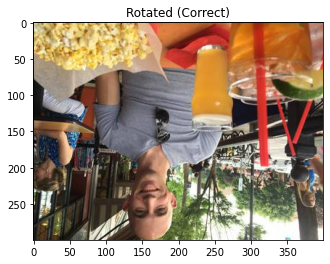

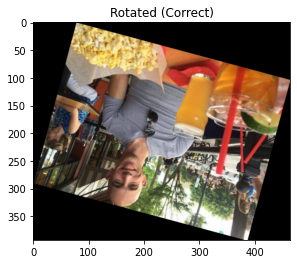

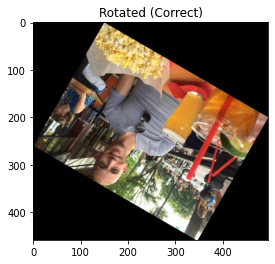

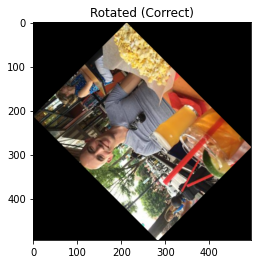

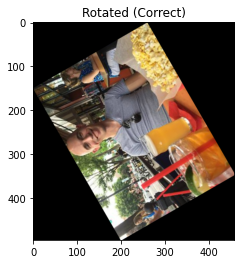

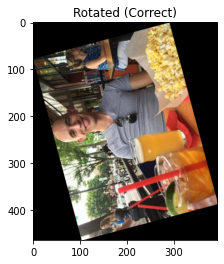

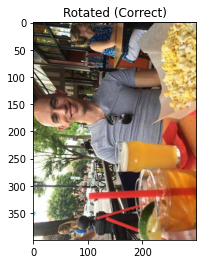

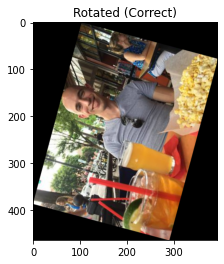

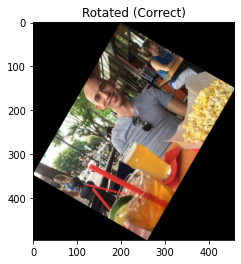

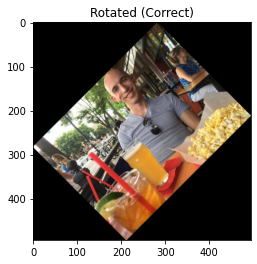

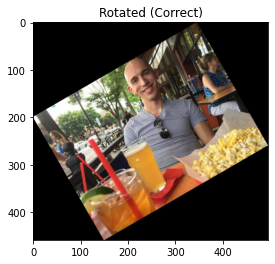

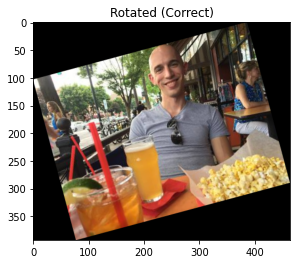

In [ ]:
# load the image from disk
image = cv2.imread(args["image"])

# loop over the rotation angles
for angle in np.arange(0, 360, 15):
    rotated = imutils.rotate(image, angle)
    plt_imshow("Rotated (Problematic)", rotated)

# loop over the rotation angles again, this time ensuring
# no part of the image is cut off
for angle in np.arange(0, 360, 15):
    rotated = imutils.rotate_bound(image, angle)
    plt_imshow("Rotated (Correct)", rotated)

### Implementing a rotation function that doesn’t cut off your images

In [ ]:
def rotate_bound(image, angle):
    # grab the dimensions of the image and then determine the
    # center
    (h, w) = image.shape[:2]
    (cX, cY) = (w // 2, h // 2)
    
    # grab the rotation matrix (applying the negative of the
    # angle to rotate clockwise), then grab the sine and cosine
    # (i.e., the rotation components of the matrix)
    M = cv2.getRotationMatrix2D((cX, cY), -angle, 1.0)
    cos = np.abs(M[0, 0])
    sin = np.abs(M[0, 1])
    
    # compute the new bounding dimensions of the image
    nW = int((h * sin) + (w * cos))
    nH = int((h * cos) + (w * sin))
    
    # adjust the rotation matrix to take into account translation
    M[0, 2] += (nW / 2) - cX
    M[1, 2] += (nH / 2) - cY
    
    # perform the actual rotation and return the image
    return cv2.warpAffine(image, M, (nW, nH))

### Fixing the rotated image “cut off” problem with OpenCV and Python

In [ ]:
# # construct the argument parse and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", required=True,
# 	help="path to the image file")
# args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
    "image": "images/pill_01.png",
}

In [ ]:
# load the image from disk, convert it to grayscale, blur it,
# and apply edge detection to reveal the outline of the pill
image = cv2.imread(args["image"])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (3, 3), 0)
edged = cv2.Canny(gray, 20, 100)

In [ ]:
# find contours in the edge map
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

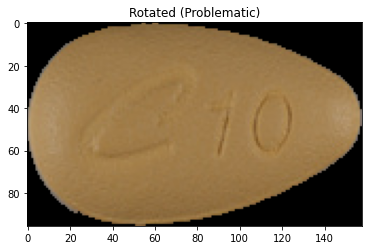

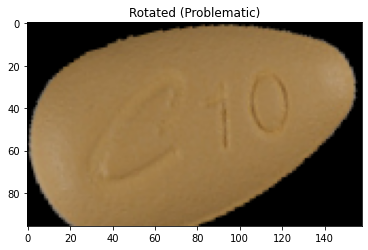

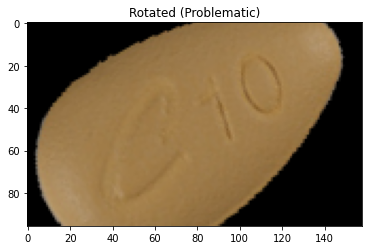

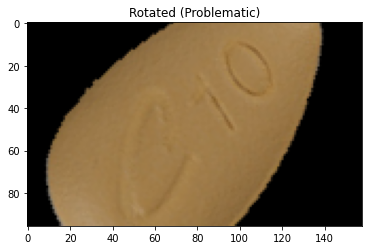

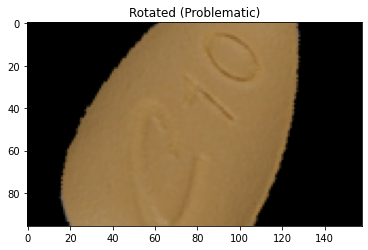

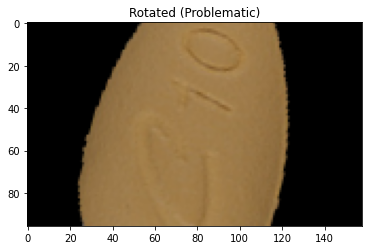

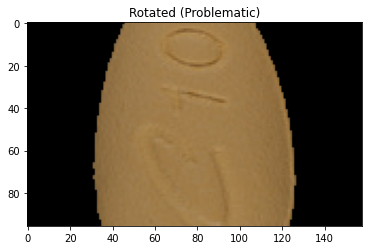

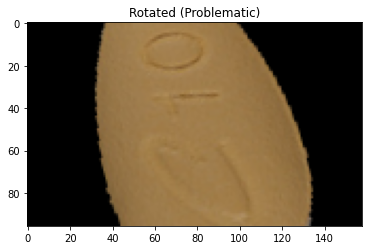

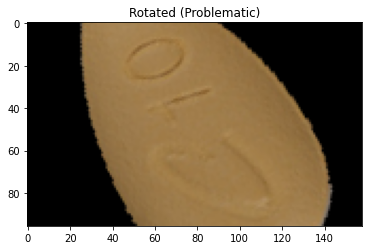

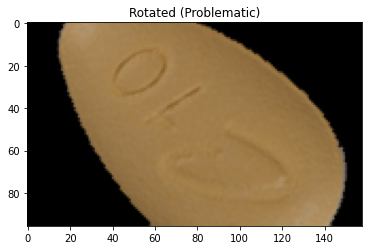

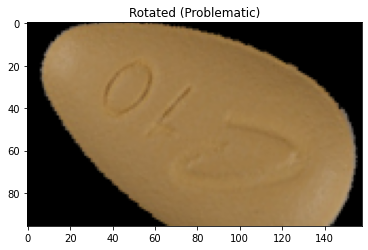

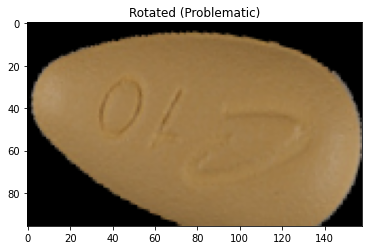

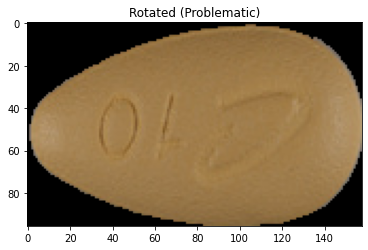

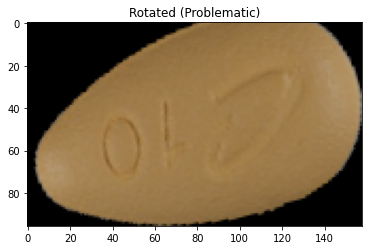

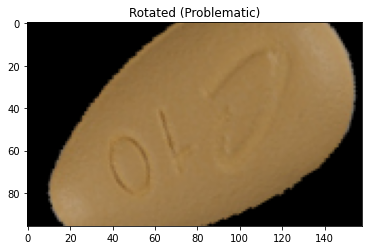

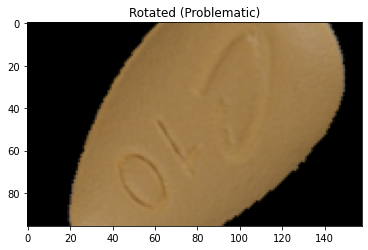

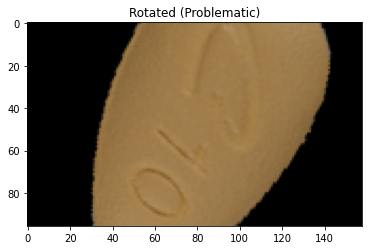

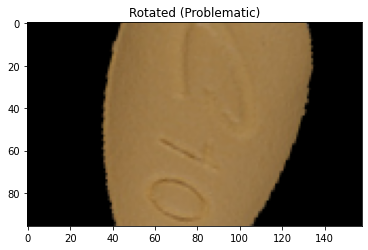

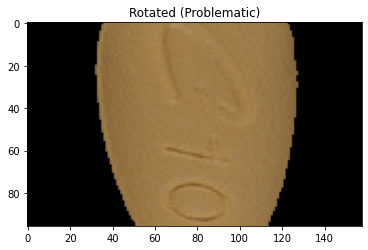

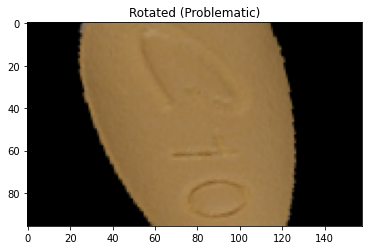

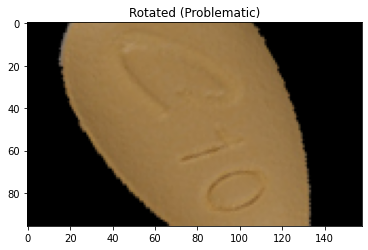

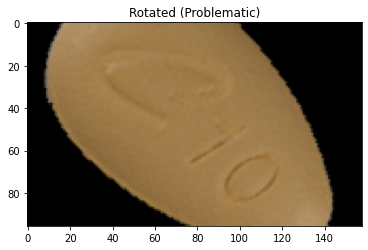

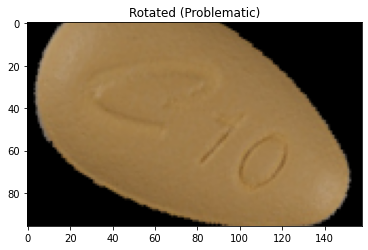

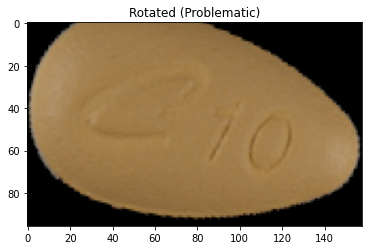

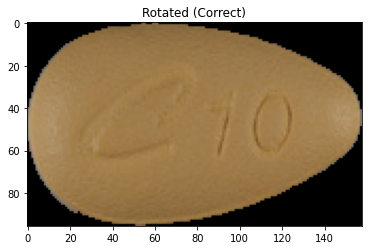

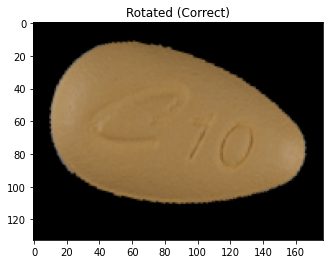

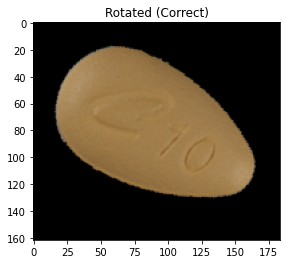

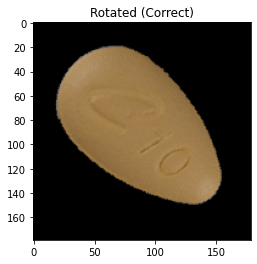

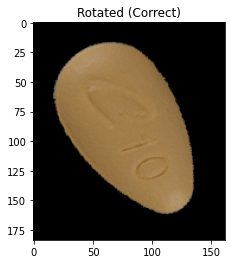

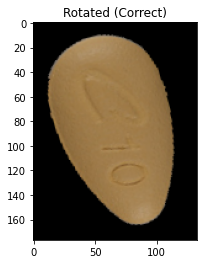

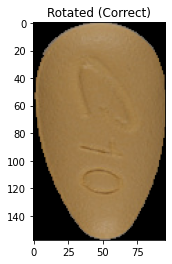

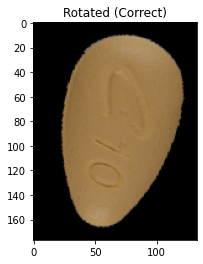

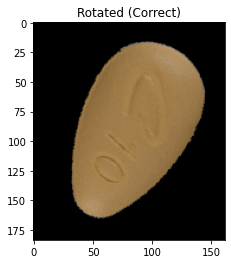

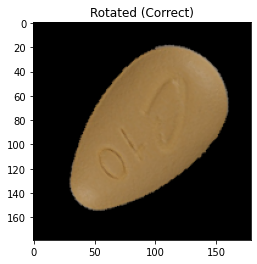

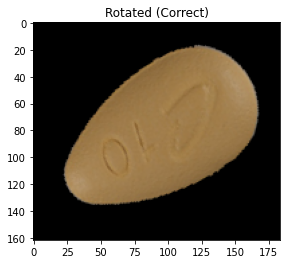

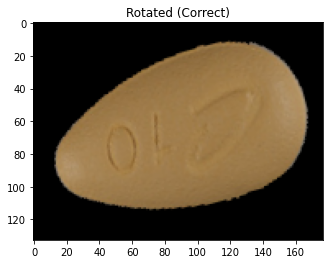

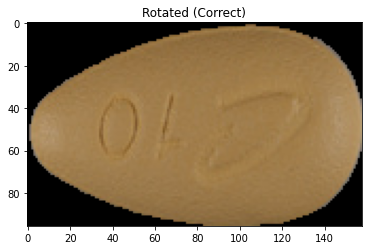

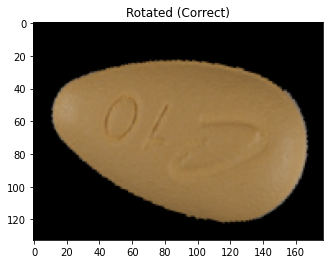

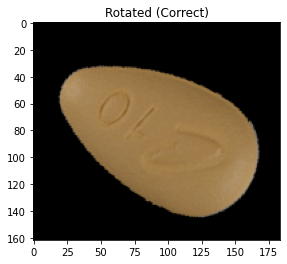

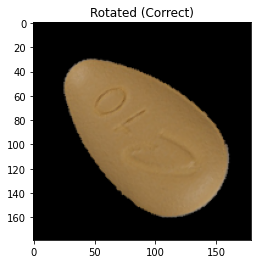

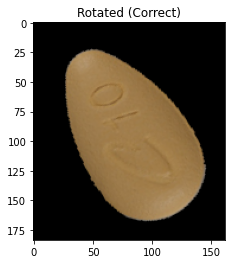

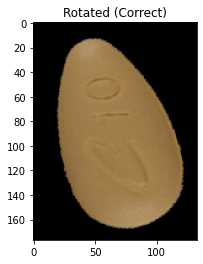

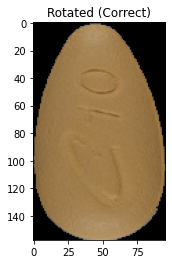

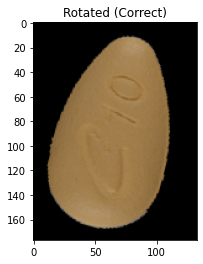

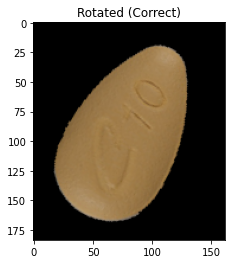

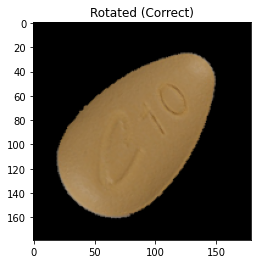

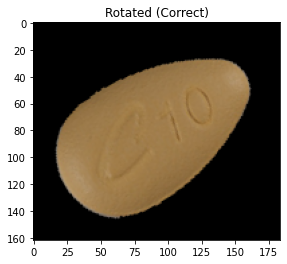

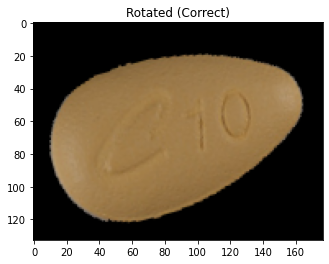

In [ ]:
# ensure at least one contour was found
if len(cnts) > 0:
	# grab the largest contour, then draw a mask for the pill
	c = max(cnts, key=cv2.contourArea)
	mask = np.zeros(gray.shape, dtype="uint8")
	cv2.drawContours(mask, [c], -1, 255, -1)

	# compute its bounding box of pill, then extract the ROI,
	# and apply the mask
	(x, y, w, h) = cv2.boundingRect(c)
	imageROI = image[y:y + h, x:x + w]
	maskROI = mask[y:y + h, x:x + w]
	imageROI = cv2.bitwise_and(imageROI, imageROI,
		mask=maskROI)
	
	# loop over the rotation angles
	for angle in np.arange(0, 360, 15):
		rotated = imutils.rotate(imageROI, angle)
		plt_imshow("Rotated (Problematic)", rotated)
	
	# loop over the rotation angles again, this time ensure the
	# entire pill is still within the ROI after rotation
	for angle in np.arange(0, 360, 15):
		rotated = imutils.rotate_bound(imageROI, angle)
		plt_imshow("Rotated (Correct)", rotated)

For a detailed walkthrough of the concepts and code, be sure to refer to the full tutorial, [*OpenCV: Rotate images (correctly) with OpenCV and Python*](https://www.pyimagesearch.com/2017/01/02/rotate-images-correctly-with-opencv-and-python/) published on 2017-01-02.

# Code License Agreement
```
Copyright (c) 2020 PyImageSearch.com

SIMPLE VERSION
Feel free to use this code for your own projects, whether they are
purely educational, for fun, or for profit. THE EXCEPTION BEING if
you are developing a course, book, or other educational product.
Under *NO CIRCUMSTANCE* may you use this code for your own paid
educational or self-promotional ventures without written consent
from Adrian Rosebrock and PyImageSearch.com.

LONGER, FORMAL VERSION
Permission is hereby granted, free of charge, to any person obtaining
a copy of this software and associated documentation files
(the "Software"), to deal in the Software without restriction,
including without limitation the rights to use, copy, modify, merge,
publish, distribute, sublicense, and/or sell copies of the Software,
and to permit persons to whom the Software is furnished to do so,
subject to the following conditions:
The above copyright notice and this permission notice shall be
included in all copies or substantial portions of the Software.
Notwithstanding the foregoing, you may not use, copy, modify, merge,
publish, distribute, sublicense, create a derivative work, and/or
sell copies of the Software in any work that is designed, intended,
or marketed for pedagogical or instructional purposes related to
programming, coding, application development, or information
technology. Permission for such use, copying, modification, and
merger, publication, distribution, sub-licensing, creation of
derivative works, or sale is expressly withheld.
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND,
EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES
OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND
NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS
BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN
ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN
CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
```